In [1]:
from osgeo import gdal

In [2]:
# path="data\LE07_L2SP_038036_20050424_20200914_02_T1\LE07_L2SP_038036_20050424_20200914_02_T1_SR_EVI.tif"
# path ="data\LE07_L2SP_040033_20050422_20200914_02_T1_SR_EVI.tif"
# path = "data\LE07_L2SP_041035_20221001_20221027_02_T1_SR_NDVI.tif"
# path ="data\LC08_L2SP_043035_20170725_20201015_02_T1_SR_EVI.tif"
path ="data\LC08_L2SP_043035_20170725_20201015_02_T1_SR_NDVI.tif"
# path="data\LC08_L2SP_042033_20200912_20200919_02_T1_SR_NDVI.tif"
dataset = gdal.Open(path)

c:\Users\hbar6\miniconda3\envs\usgs-client\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [3]:
width = dataset.RasterXSize
height = dataset.RasterYSize
bands = dataset.RasterCount
geotransform = dataset.GetGeoTransform()
projetion = dataset.GetProjection()

In [4]:
band = dataset.GetRasterBand(1)
data = band.ReadAsArray()

In [5]:
data.shape

(7741, 7601)

In [6]:
mapbox_token = "pk.eyJ1IjoiZG1jZG9uYWxkOTQ4MSIsImEiOiJjbHd4N3EwamwxMnhnMmlwemNiaDNqOHhrIn0.XjFg3HBwIg56bEGPe3DIHA"

In [7]:
import rasterio
from rasterio.transform import from_bounds
import pyproj
from shapely.geometry import box
from shapely.ops import transform


rdata = rasterio.open(path)

left, bottom, right, top = rdata.bounds

rdata_crs = rdata.crs

bbox = box(left, bottom, right, top)

project = pyproj.Transformer.from_crs(rdata_crs, 'EPSG:4326', always_xy=True).transform

bbox_latlon = transform(project, bbox)

min_lon, min_lat, max_lon, max_lat = bbox_latlon.bounds


In [8]:
cul_lat = 37.0987
cul_lon = -122.22914

cur_lat = 37.05432
cur_lon = -119.66579	

cll_lat = 35.00541
cll_lon = -122.24929	

clr_lat = 34.96428
clr_lon = -119.75276



In [16]:
import plotly.graph_objects as go

fig = go.Figure()

world_map = go.Scattermapbox(
    lat=[cul_lat, cur_lat, clr_lat, cll_lat, cul_lat],
    lon=[cul_lon, cur_lon, clr_lon, cll_lon, cul_lon],
    mode="lines",
    # fill="toself",
    # fillcolor=None
)

fig.add_trace(world_map)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_mapboxes(
    accesstoken=mapbox_token,
    style="mapbox://styles/mapbox/satellite-v9",
    center={
        "lat":37,
        "lon":-117
    },
    zoom = 5
)

fig.write_image("out_map_nostreets.png", scale=2)

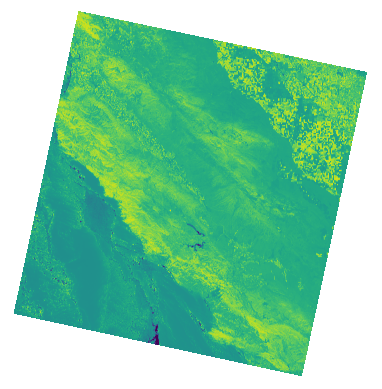

In [10]:
import numpy as np
import matplotlib.pyplot as plt

img_data = (data+abs(data.min()))/data.max()
img_data[img_data == 0] = np.nan
cmap = plt.cm.viridis
cmap.set_bad(color='none')

plt.imshow(img_data)
plt.axis('off')
plt.savefig("test_img.png", bbox_inches='tight', pad_inches=0, transparent=True)


In [ ]:
data.max()